In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
before_data = Table.read('/tmp/benchmark_before.csv')
after_data = Table.read('/tmp/benchmark_after.csv')
repeat = 20

In [3]:
before_agg = before_data.group_by(['Image', 'Kernel', 'Implementation']).groups.aggregate(np.mean)
after_agg = after_data.group_by(['Image', 'Kernel', 'Implementation']).groups.aggregate(np.mean)

In [4]:
before_agg['Implementation'] = [i.split('<')[0] for i in before_agg['Implementation']]
after_agg['Implementation'] = [i.split('<')[0] for i in after_agg['Implementation']]

<IPython.core.display.Javascript object>


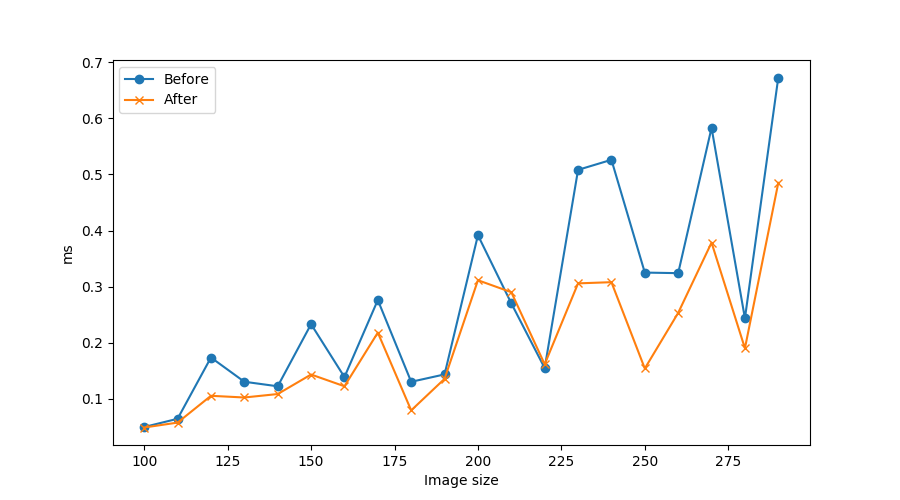

In [5]:
ref_kernel_size = 45
impl = 'SExtractor::DFTConvolution'

before = before_agg[(before_agg['Kernel'] == ref_kernel_size) & (before_agg['Implementation'] == impl)]
after = after_agg[(after_agg['Kernel'] == ref_kernel_size) & (after_agg['Implementation'] == impl)]

plt.figure(figsize=(9,5))
plt.plot(before['Image'], before['Time']/(repeat*1e6), 'o-', label='Before')
plt.plot(after['Image'], after['Time']/(repeat*1e6), 'x-', label='After')
plt.ylabel('ms')
plt.xlabel('Image size')
plt.legend()